## Visualização de Séries Temporais

In [3]:
import pandas as pd

/home/aluno/anaconda3/lib/python3.11/site-packages/pandas/core/arrays/masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (


In [4]:
df = pd.read_csv('starbucks.csv', index_col='Date', parse_dates=True)
df.head()

,Close,Volume
Date,,
2015-01-02,38.0061,6906098
2015-01-05,37.2781,11623796
2015-01-06,36.9748,7664340
2015-01-07,37.8848,9732554
2015-01-08,38.4961,13170548


Usando o comando plot em um objeto dataframe, pandas irá plotar todas as colunas numéricas do dataframe.

<Axes: xlabel='Date'>

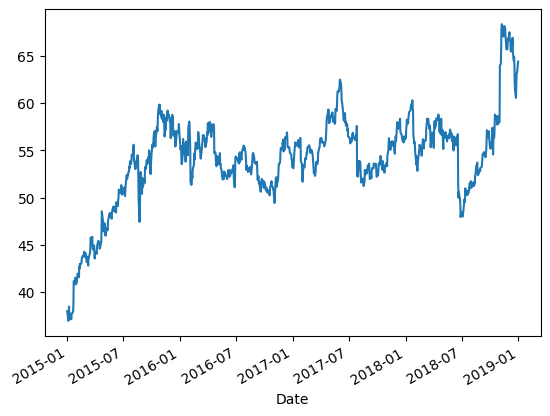

In [5]:
df["Close"].plot()

Notamos no gráfico que os dados estão em escalas muito diferentes porque sáo sematicamente diferentes. Então temos que plotá-los separadamente.

Vamos plotar o valor de fechamento das ações (Close) e depois o volume negociado (Volume).

<Axes: xlabel='Date'>

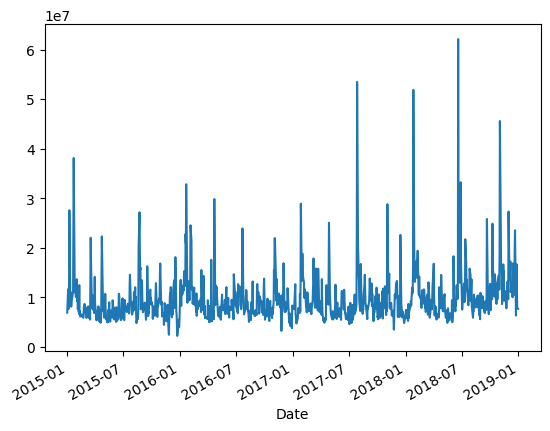

In [6]:
df["Volume"].plot()

Vamos agora trabalhar com o gráfico do valor de fechamento das ações. Vamos melhorar este gráfico colocando um título e labels para os eixos x e y do gráfico.

In [7]:
title = "Starbucks - Valor de Fechamento"
label_x = "Datas"
label_y = "Preço da ação"
            

<Axes: title={'center': 'Starbucks - Valor de Fechamento'}, xlabel='Datas', ylabel='Preço da ação'>

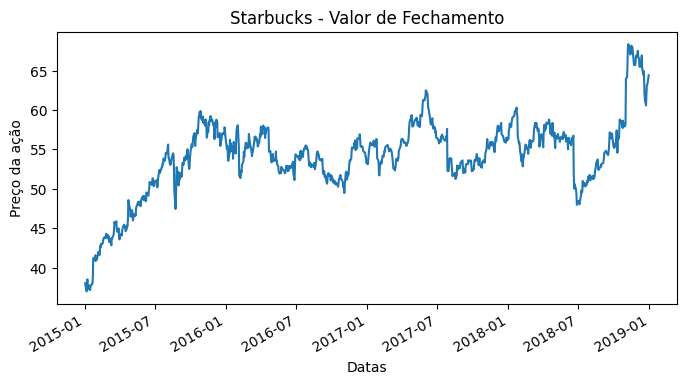

In [8]:
df["Close"].plot(title=title,figsize=(8,4),xlabel=label_x, ylabel=label_y)

Um jeito interessante de ajustar os parâmetros do gráfico é salvá-lo numa variável e usar a função set. Vejamos como fazer isso.

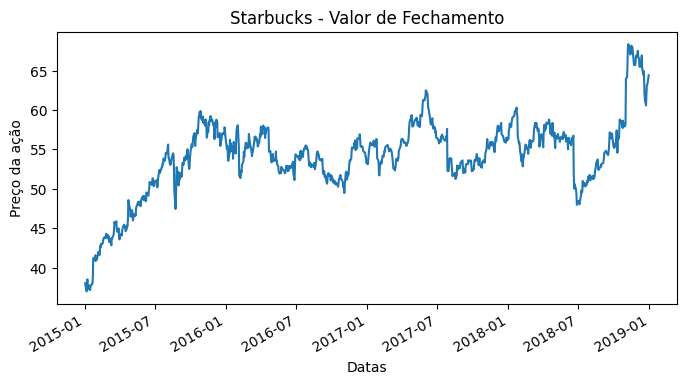

In [12]:
graf = df["Close"].plot(figsize=(8,4))
graf.set(title=title,xlabel=label_x, ylabel=label_y);

Podemos também fazer ajustes na escala do gráfico usando autoscale.

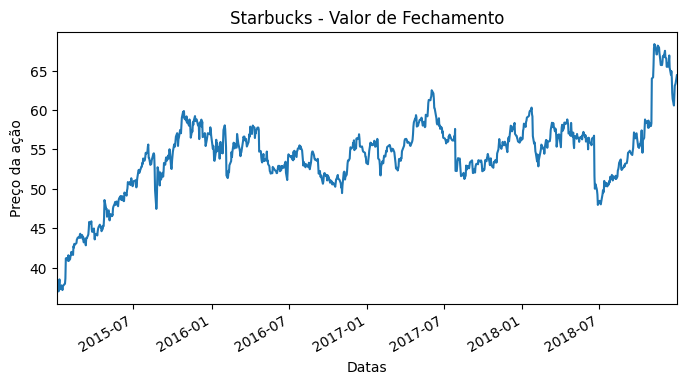

In [13]:
graf = df["Close"].plot(figsize=(8,4))
graf.set(title=title,xlabel=label_x, ylabel=label_y)
graf.autoscale(axis="x", tight=True)

Suponha agora que queiramos plotar os dados de um período específico, digamos o ano de 2017. Como fazer isso?

Primeiro precisamos obter o valor de 'Close' apenas no intervalo desejado.

<Axes: xlabel='Date'>

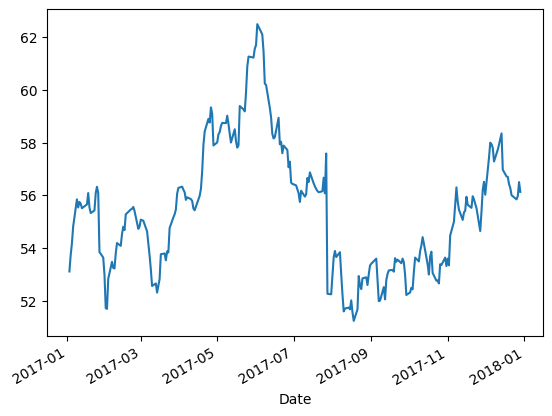

In [14]:
df["Close"]["2017-01-01" : "2017-12-31"]

Vamos agora plotar o gráfico.

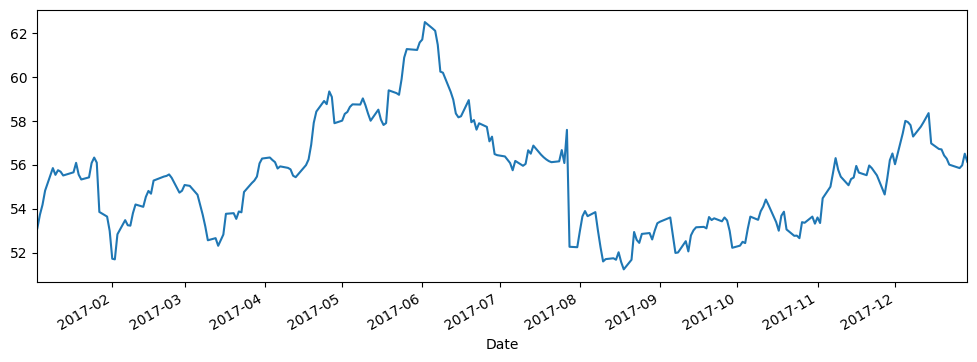

In [20]:
graf = df["Close"]["2017-01-01" : "2017-12-31"].plot(figsize=(12,4))
graf.autoscale(axis="x", tight=True)


Há uma outra maneira de plotar os dados de um período específico. Nesta outra forma usamos o parâmetro 'xlim' de plot.

<Axes: xlabel='Date'>

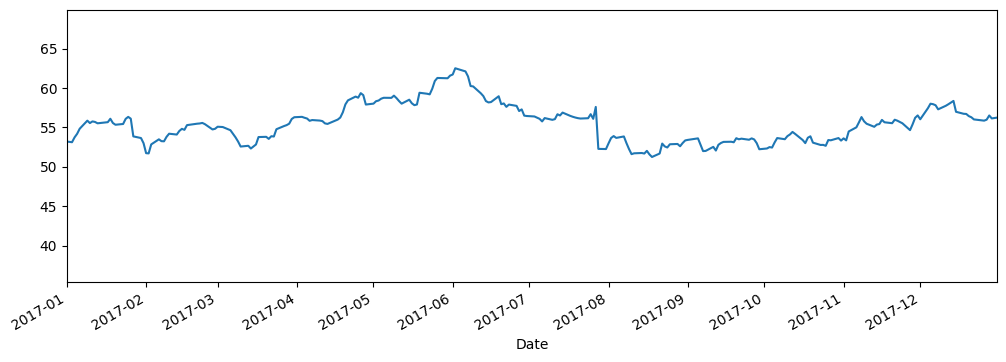

In [22]:
df["Close"].plot(figsize=(12,4),xlim=["2017-01-01" , "2017-12-31"])


Suponha que queiramos mudar o tipo da linha e sua cor.

<Axes: xlabel='Date'>

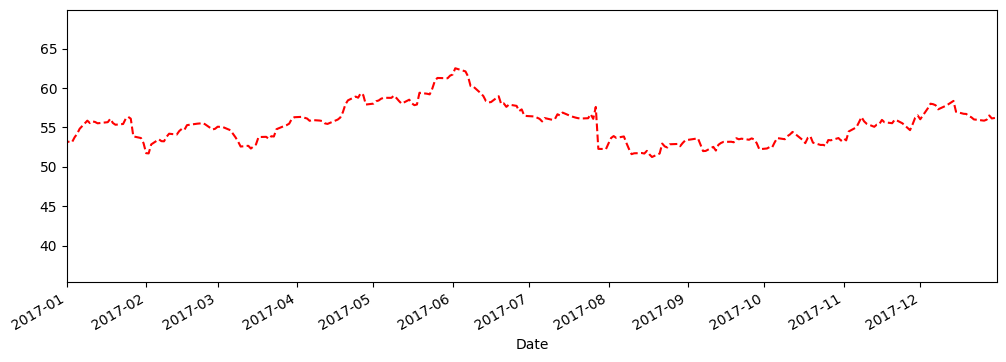

In [26]:
df["Close"].plot(figsize=(12,4),xlim=["2017-01-01" , "2017-12-31"] , ls="--", c="red")


Veremos agora como mudar o formato e aparência das datas que aparecem ao longo do eixo. Para tanto, vamos usar a ferramenta *dates* da biblioteca *matplotlib*.


In [27]:
from matplotlib import dates

Vamos começar plotando os valores de fechamento das ações enre os dias 01/01/2017 e 01/03/2017.

<Axes: xlabel='Date'>

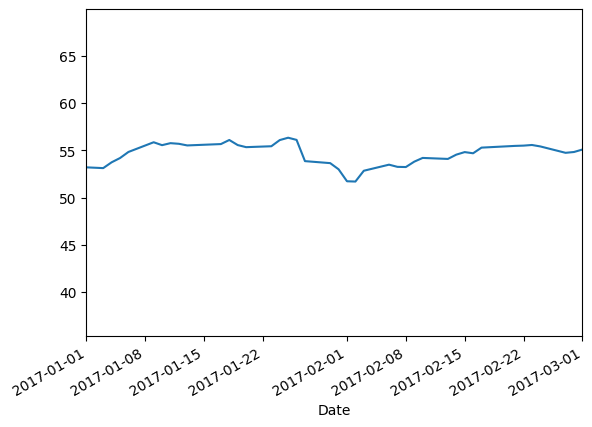

In [29]:
df["Close"].plot(xlim=["2017-01-01" , "2017-03-01"])


Para melhorar o nosso gráfico, vamos ajustar os valores de y entre 50 e 60 e utilizar figsize=(12,5)

<Axes: xlabel='Date'>

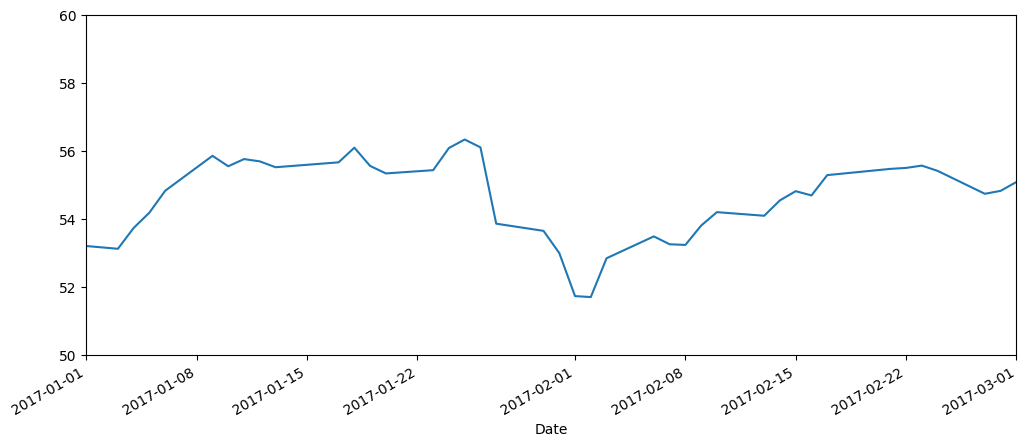

In [31]:
df["Close"].plot(figsize=(12,5),xlim=["2017-01-01" , "2017-03-01"], ylim=[50 , 60])


Percebam agora os intervalos entre as datas no eixo X. Por padrão, o python coloca esse espaçamento de 7 dias, mas no final do mês o espaçamento é maior e depois começa novamente no primeiro dia de fevereiro. Como ajustar esse espaçamento de maneira que ele tenha sempre 7 dias? Para tanto devemos utilizar *date tickers*.

Para mais informações sobre *date tickers* visite: <a href='https://matplotlib.org/stable/api/dates_api.html'>https://matplotlib.org/stable/api/dates_api.html</a>

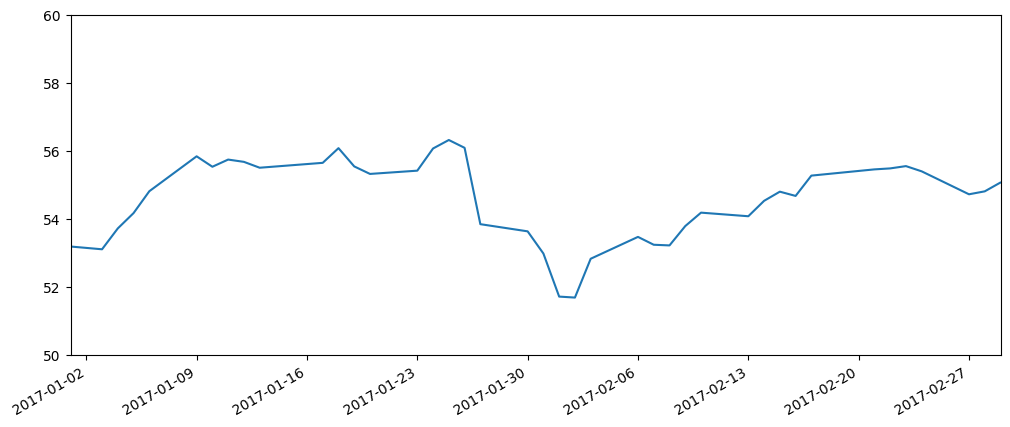

In [33]:
graf = df["Close"].plot(figsize=(12,5),xlim=["2017-01-01" , "2017-03-01"], ylim=[50 , 60])
graf.set(xlabel="")
graf.xaxis.set_major_locator(dates.WeekdayLocator(byweekday=0))


### Formatação de datas
As datas exibidas no nosso gráfico estão no formato americano. Para ajustarmos o formato devemos utilizar *set_major_formatter*. A tabela abaixo exibe os códigos utilizados na formatação de datas.


<table style="display: inline-block">  
<tr><th>CÓDIGO</th><th>SIGNIFICADO</th><th>EXEMPLO</th><tr>
<tr><td>%Y</td><td>Ano com 4 dígitos.</td><td>2001</td></tr>
<tr><td>%y</td><td>Ano com 2 dígitos.</td><td>01</td></tr>
<tr><td>%m</td><td>Mês - representação numérica.</td><td>02</td></tr>
<tr><td>%B</td><td>Mês - nome completo.</td><td>February</td></tr>
<tr><td>%b</td><td>Mês - nome abreviado.</td><td>Feb</td></tr>
<tr><td>%d</td><td>Dia do mês.</td><td>03</td></tr>  
<tr><td>%A</td><td>Dia da semana - nome completo.</td><td>Saturday</td></tr>
<tr><td>%a</td><td>Dia da semana - nome abreviado.</td><td>Sat</td></tr>
<tr><td>%H</td><td>Hora - formato 24 hs.</td><td>16</td></tr>
<tr><td>%I</td><td>Hora - formato 12 hs.</td><td>04</td></tr>
<tr><td>%p</td><td>AM / PM.</td><td>PM</td></tr>
<tr><td>%M</td><td>Minuto.</td><td>05</td></tr>
<tr><td>%S</td><td>Segundo.</td><td>06</td></tr>
</table>
<table style="display: inline-block">
<tr><th>CÓDIGO</th><th>SIGNIFICADO</th><th>EXEMPLO</th><tr>
<tr><td>%#m</td><td>Mês como um número inteiro. (Windows)</td><td>2</td></tr>
<tr><td>%-m</td><td>Mês como um número inteiro. (Mac/Linux)</td><td>2</td></tr>
<tr><td>%#x</td><td>Data - formato longo</td><td>Saturday, February 03, 2001</td></tr>
<tr><td>%#c</td><td>Data e hora - formato longo</td><td>Saturday, February 03, 2001 16:05:06</td></tr>
</table>  

Vamos agora plotar o gráfico usando o formato de datas brasileiro.

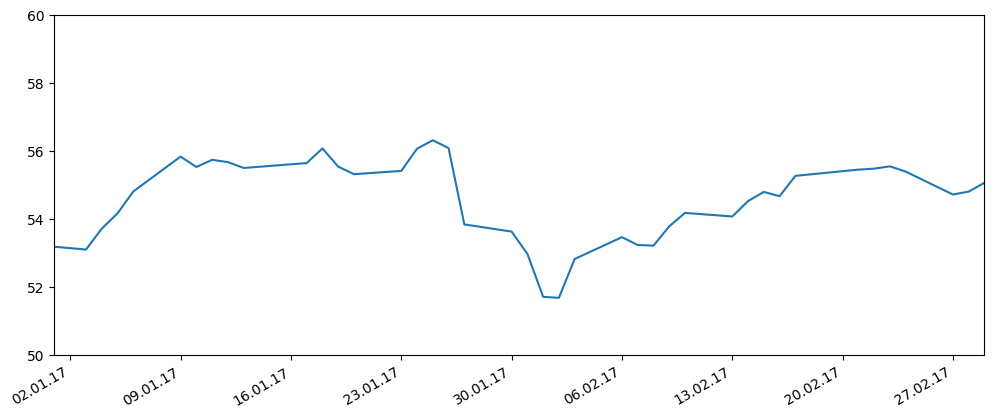

In [35]:
graf = df["Close"].plot(figsize=(12,5),xlim=["2017-01-01" , "2017-03-01"], ylim=[50 , 60])
graf.set(xlabel="")
graf.xaxis.set_major_locator(dates.WeekdayLocator(byweekday=0))
graf.xaxis.set_major_formatter(dates.DateFormatter("%d.%m.%y"))


Vamos agora entender como usar major e minor para locator e formater.

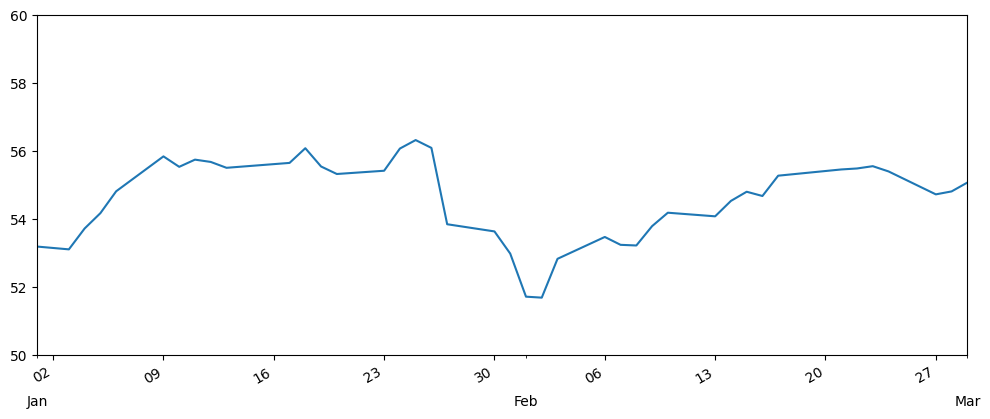

In [38]:
graf = df["Close"].plot(figsize=(12,5),xlim=["2017-01-01" , "2017-03-01"], ylim=[50 , 60])
graf.set(xlabel="")
graf.xaxis.set_major_locator(dates.WeekdayLocator(byweekday=0))
graf.xaxis.set_major_formatter(dates.DateFormatter("%d"))

graf.xaxis.set_minor_locator(dates.MonthLocator())
graf.xaxis.set_minor_formatter(dates.DateFormatter("\n\n%b"))


Por fim, veremos como colocar linhas horizontais e verticais no gráfico.

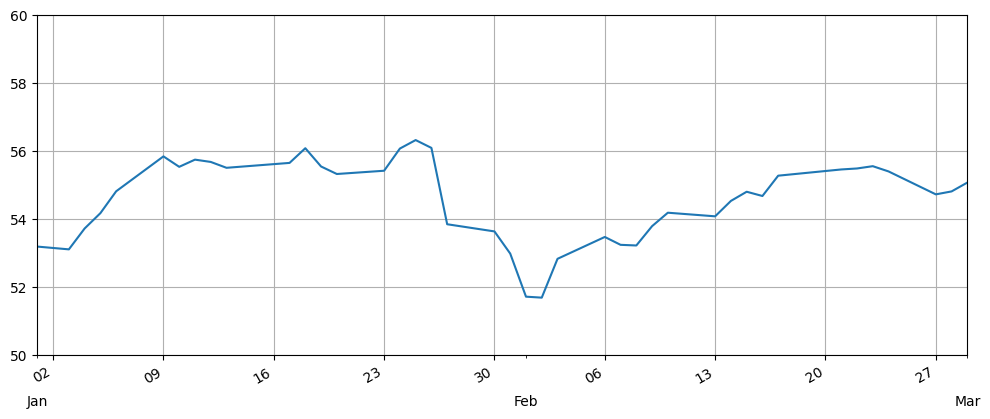

In [41]:
graf = df["Close"].plot(figsize=(12,5),xlim=["2017-01-01" , "2017-03-01"], ylim=[50 , 60])
graf.set(xlabel="")
graf.xaxis.set_major_locator(dates.WeekdayLocator(byweekday=0))
graf.xaxis.set_major_formatter(dates.DateFormatter("%d"))

graf.xaxis.set_minor_locator(dates.MonthLocator())
graf.xaxis.set_minor_formatter(dates.DateFormatter("\n\n%b"))

graf.xaxis.grid(True)
graf.yaxis.grid(True)